# Tutorial: Fourier transforms


1. Consider the signal:

$f(t)=\sin(0.8\,t) + \cos(2.5\,t)$,


which consists of the linear combination of two functions:

$f_1(t) = \sin(\omega_1\,t) = \sin(2\,\pi\,\nu_1\,t) = \sin(0.8\,t)$


$f_2(t) = \cos(\omega_2\,t) = \cos(2\,\pi\,\nu_2\,t) = \cos(2.5\,t)$

In [42]:
import numpy as np

import matplotlib.pyplot as plt

In [43]:
def frequency(w):
    return w/(2*np.pi)

In [44]:
w_1 = 0.8
w_2 = 2.5

In [45]:
nu_1 = frequency(w_1)
nu_2 = frequency(w_2)

In [46]:
print(nu_1)
print(nu_2)

0.12732395447351627
0.3978873577297384


In [47]:
def function(t): 
    return  np.sin(0.8*t) + np.cos(2.5*t)

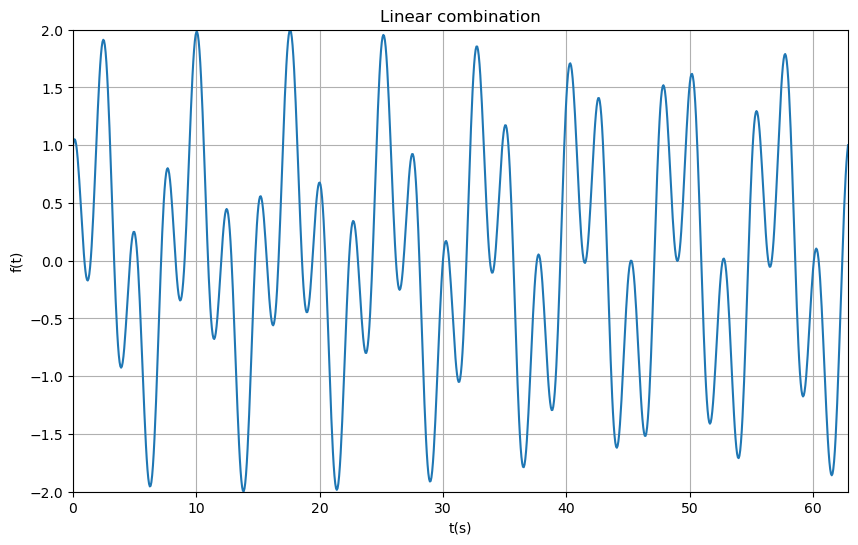

In [105]:
# t_axis for plotting
t = np.linspace(0, 20*np.pi, 1000, endpoint=True)

#define range for x and y
axes_range = [0, 20*np.pi, -2, 2]

#plotting
plt.figure(figsize = (10, 6))
plt.plot(t, function(t))
plt.title('Linear combination');
plt.xlabel('t(s)')
plt.ylabel('f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()


In [115]:
F = np.fft.fft(function(t), t.size)
F_m = np.abs(F)

freqs = np.fft.fftfreq(t.size, 20*np.pi/1000)

print(F_m.shape)
print(freqs.shape)

(1000,)
(1000,)


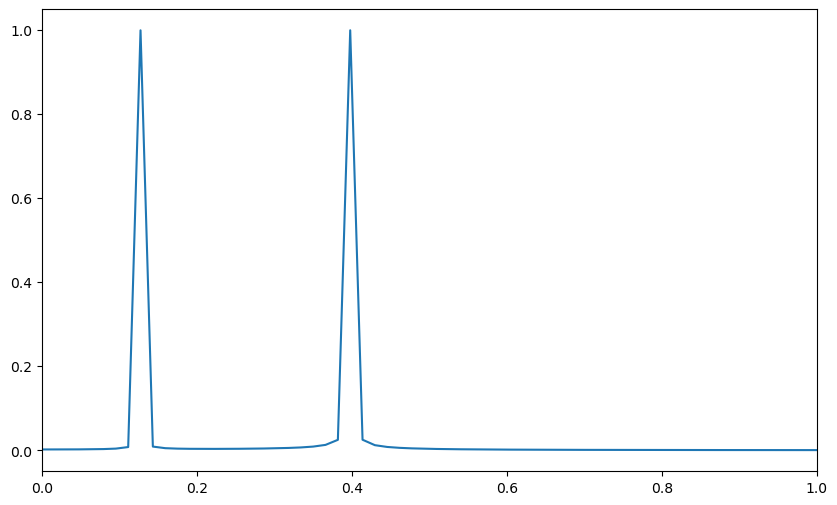

In [119]:
plt.figure(figsize=(10,6))

plt.plot(freqs[0:freqs.size//2], (2/F_m.size)*F_m[0:F_m.size//2])

plt.xlim(0,1)
plt.show()

In [122]:
from scipy.signal import find_peaks

In [127]:
amp_Fm = (2/F_m.size)*F_m[0:F_m.size//2]

peaks, _ = find_peaks(amp_Fm, height=0)

print(peaks)

[ 8 25]


0.3978873577297383

In [128]:
peak_freq1 = freqs[peaks[0]]
peak_freq2 = freqs[peaks[1]]

print(peak_freq1, peak_freq2)

0.12732395447351627 0.3978873577297383


/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


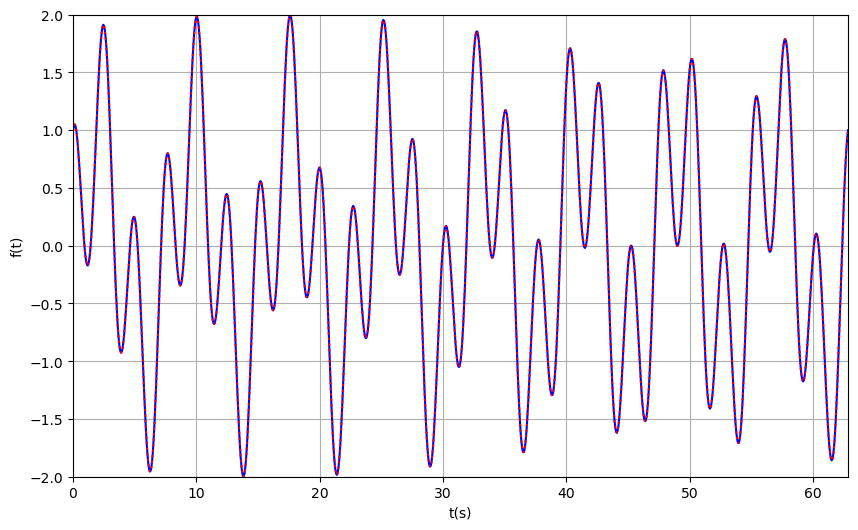

In [143]:
#inverse fft

iF = ifft(F)

#plotting
plt.figure(figsize = (10, 6))
plt.plot(t, function(t), linestyle = '-', c = 'blue')
plt.plot(t, iF, linestyle = ':', c = 'red')
plt.xlabel('t(s)')
plt.ylabel('f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()